In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None


from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

#Encoding schtuff
from sklearn import preprocessing
from sklearn import utils

# Feature selection lib
from sklearn.feature_selection import RFE

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt
import math

## Import Dataset

In [2]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [3]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

## Understanding the data

#### Correlation of Features

In [4]:
def plot_pearson_correlation_of_features(train):
    plt.figure(figsize=(14,12))
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.savefig("correlation.png")
    plt.show()

In [5]:
def plot_correlation_features_against_target(train, target):
 
    fig, ax = plt.subplots(nrows=5, ncols=2,figsize=(18,30))
    columns = train.columns.values[:-1]
    i = 0
    for row in ax:
        for col in row:
    

            color = np.random.rand(3,)
            if i >= len(columns):
                break
            column = columns[i]
            col.scatter(train[column], train[target], color=color)
            col.set_title(target + " against " + column)
            col.set_ylabel(target)
            i+=1
#                 col.xlabel(column)
     
    
    fig.savefig("scatterplot.png")
   
    plt.show()

In [6]:
def scatter_plot_by_group(train, target):
    i = 0
    i1 = 0
    columns = train.drop(target, 1).columns
    fig, ax = plt.subplots(nrows=int(len(columns)**2/3) + 1, ncols=3, figsize=(18,6*int(len(columns)**2/2) + 1))
    # ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    for row in ax:
        for col in row:
            
            col.legend()
            column1 = columns[i]
            column2 = columns[i1]
            groups = train[[column1, column2, target]].groupby(target)


            for name, group in groups:
                col.set_xlabel(group.columns[0])
                col.set_ylabel(group.columns[1])
                col.scatter(group[group.columns[0]], group[group.columns[1]], alpha=0.1, label=name)

            # update i, i1
            i1 = i1 + 1
            if i1 == len(columns):
                i1 = 0
                i = i + 1

            if i1 >= len(columns) or i >= len(columns):
                break

    fig.savefig("graph.png")
    plt.show()    

In [7]:
def plot_normal_distribution(score, std):
    
    plt.title('Confidence interval - Normal Distribution')
    variance = std
    sigma = math.sqrt(variance)
    x = np.linspace(score - 3*sigma, score + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, score, sigma))
    plt.show()

In [8]:
def tplot(score, std):
    
    keys = list(score.keys())
    print(keys)
    score = np.fromiter(iter(score.values()), dtype=float)
    error = np.fromiter(iter(std.values()), dtype=float)

    x = score
    y = np.exp(-x)

    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=0.2, yerr=error)
    plt.xticks(x, keys)
    plt.title('Confidence interval - T-Plot')
    plt.xlim([-1,1])
    plt.show()

In [70]:
def validation_curve(alg, param_range, train_scores_mean, test_scores_mean, train_scores_std, test_scores_std):
    
    param_label = list(param_range.keys())[0]
    param_value = param_range[param_label]
    plt.title("Validation Curve with " + alg.upper())
    plt.xlabel(param_label)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_value, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_value, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_value, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_value, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

#### Visualise correlation between features and Target
Scatter Plot by value

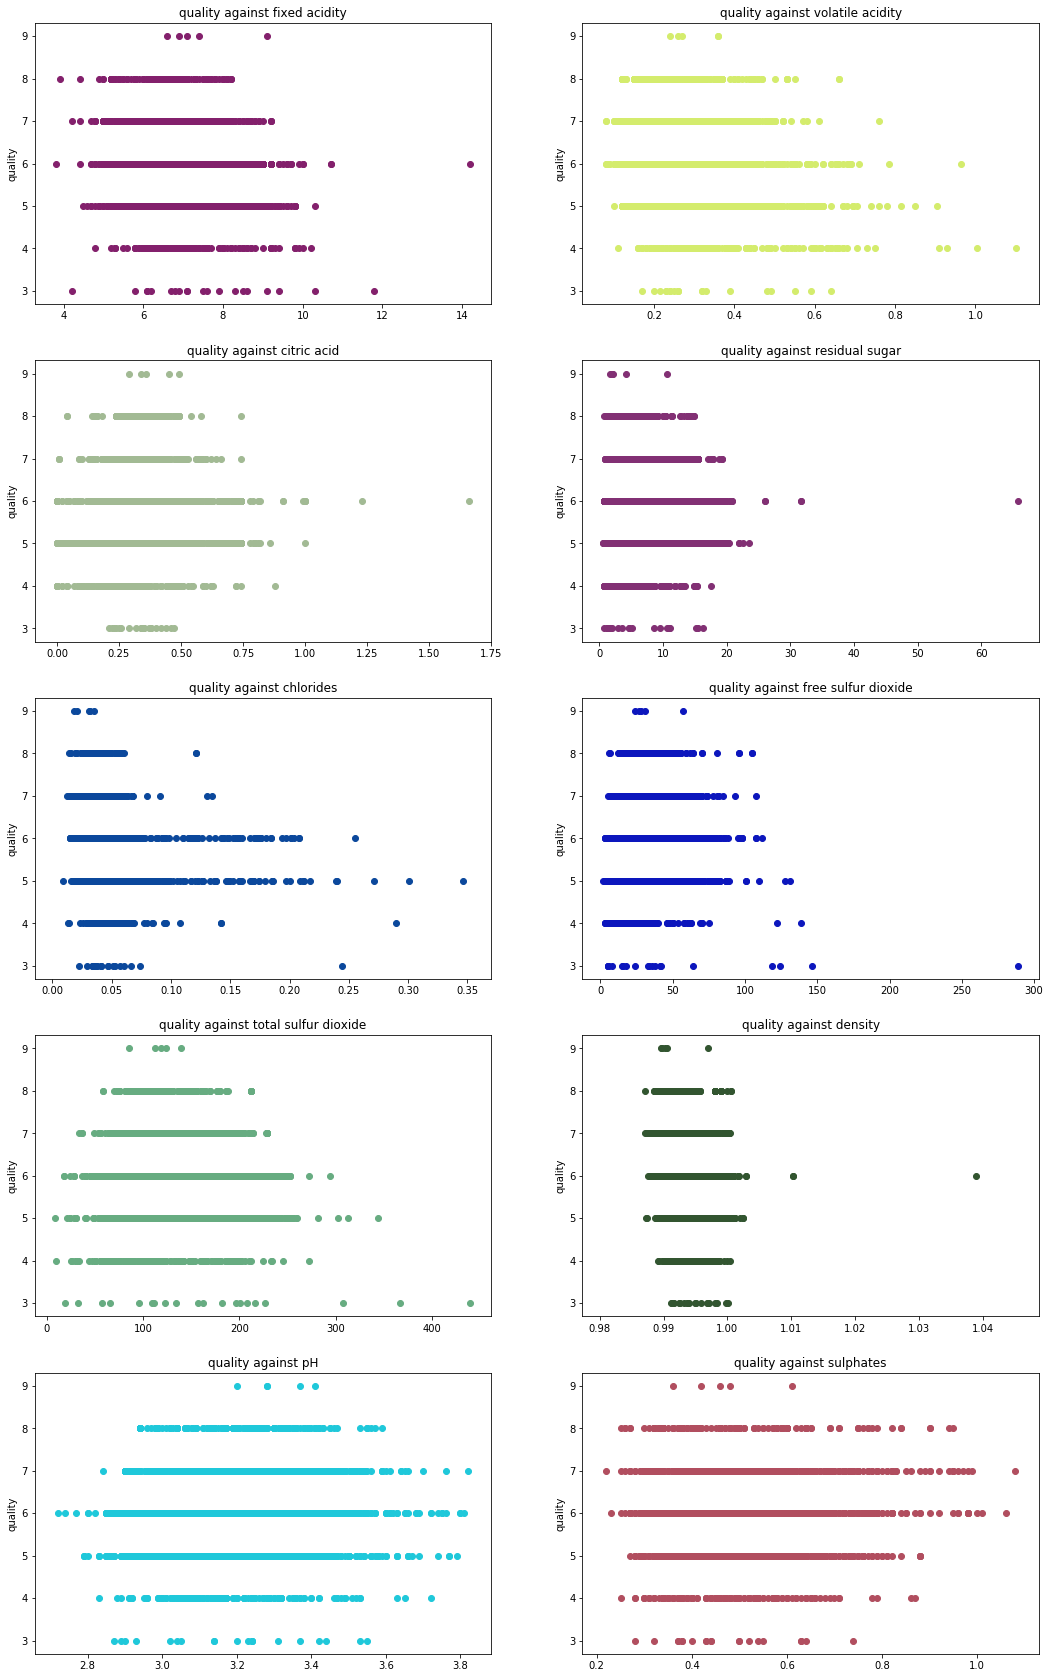

In [9]:
plot_correlation_features_against_target(data, "quality")

#### Visualise summerization of correlation between features
Pearson correlation of feature

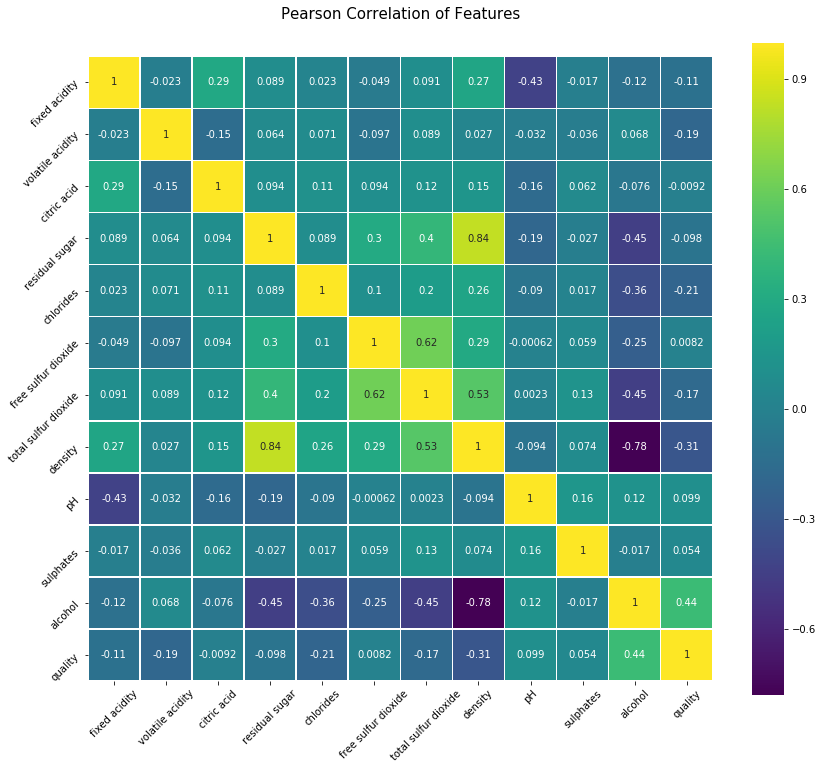

In [10]:
plot_pearson_correlation_of_features(data)

#### Understand the distributions of quality along feature
Scatter plot by group

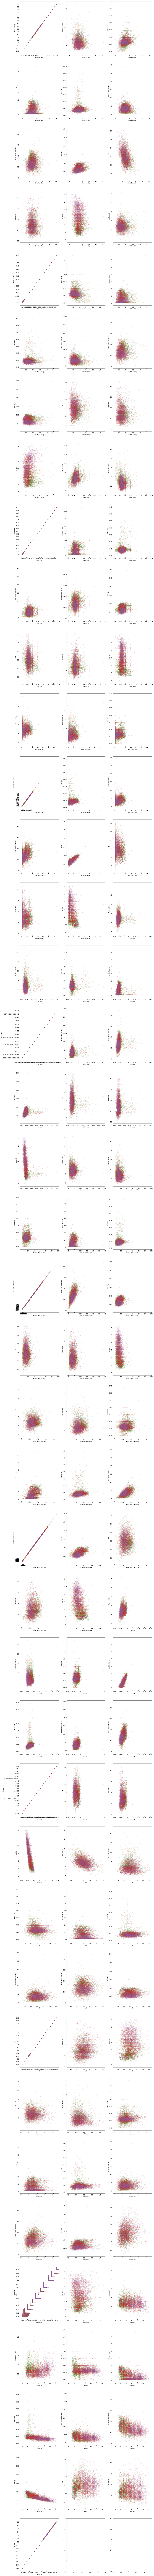

In [11]:
scatter_plot_by_group(data, 'quality')

##### Visualise the value distribution of features

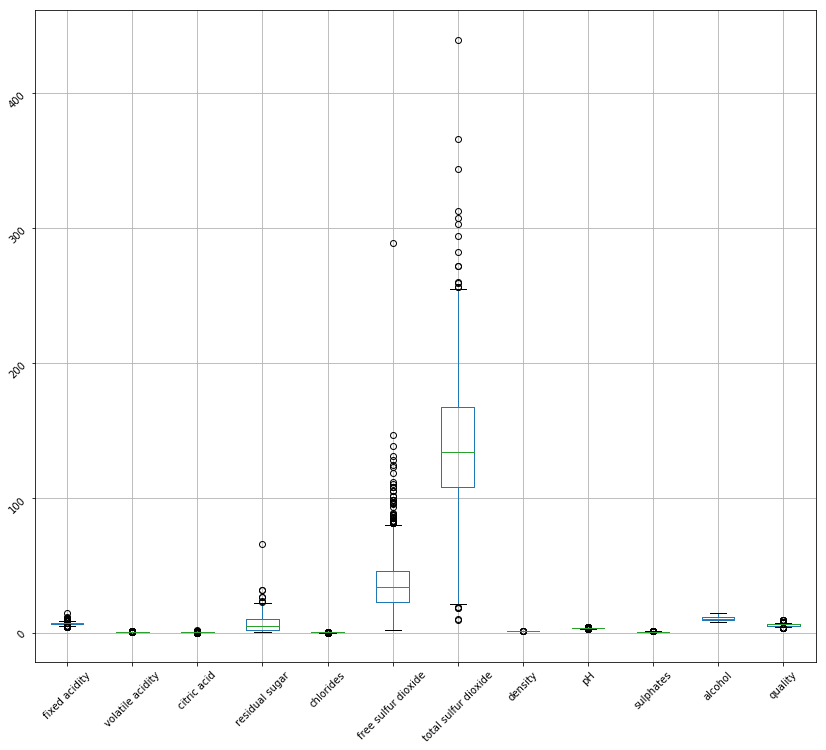

In [12]:
plt.figure(figsize=(14,12))
data.boxplot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Data Preprocessing

In [13]:
#### Feature Scaling

In [14]:
y = data["quality"]
X = data.iloc[:,:-1]

In [15]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.values)
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature Selection

##### We are trying to 
    - Fit the model to the data
    - Get Score
    - Get the confidence interval of the score

##### Maybe 
    - Try to evaluate overfitting/underfitting by calculate mean_square_error on validation set(not sure if we can do this easy through corss_val_score or Grid_serach

#### Declare Essential Variable

In [16]:
test_score = {}
train_score = {}
std_test = {}
std_train = {}
parameters = {} 

best_test_score = {}
best_train_score = {}
best_std_test = {}
best_std_train = {}
best_parameters = {}

## Modelling

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


#### We use grid_search_cv to fit the algorithm to the dataset
    - Use grid search to tune the hyper-parameter of the algorithm, e.g it will use the parameter of the best score to fit the dataset
    - grid_search_cv will compute the score through 10-fold cross validation.


In [22]:
def grid_search_model_fit(estimator, parameters, X, y):
    clf = GridSearchCV(estimator=estimator, param_grid=parameters, cv=10, n_jobs=-1)
    clf.fit(X, y)
    
    # return the classifier
    return clf

## Score Evaluation with confidence interval

In [23]:
def score_evaluation(score, std):
    
    # print the score and confidence interval of each algorithm
    for alg in score:
        
        # plot the normal distribution of the accuracy
        plot_normal_distribution(score[alg], std[alg])
        
        # plot the tplot of the score
        tplot(score, std)
        
        print("Algorithm: {}\n".format(alg))
        print("Accuracy: %0.2f (+/- %0.2f)" % (score[alg], std[alg] * 2))
    
    # boxplot the score and confidence interval of each agortihm
    
    
    
    

## Feature Elimination

In [24]:
from sklearn.feature_selection import  RFECV
from sklearn.svm import SVC  

estimator = SVC(kernel='linear', C=1)
selector =  RFECV(estimator, step = 1, cv=5, n_jobs=-1)
selector.fit(X, y)
selector.support_



array([ True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True], dtype=bool)

In [25]:
svm_ranked_features = sorted(list(zip(selector.ranking_,data.columns.values[:-1])))
svm_ranked_features

[(1, 'alcohol'),
 (1, 'chlorides'),
 (1, 'density'),
 (1, 'fixed acidity'),
 (1, 'free sulfur dioxide'),
 (1, 'pH'),
 (1, 'residual sugar'),
 (1, 'volatile acidity'),
 (2, 'sulphates'),
 (3, 'citric acid'),
 (4, 'total sulfur dioxide')]

In [26]:
top_features = [ svm_ranked_features[i][1] for i in range(len(svm_ranked_features))]

## Overfittin/Underfitting Evaluation

In [68]:
def overfitting_underfitting_evaluation(alg, param_range, train_scores_mean, test_scores_mean, train_scores_std, test_scores_std):
    
    print(alg)
    validation_curve(alg, param_range, train_scores_mean, test_scores_mean, train_scores_std, test_scores_std)

## Model Evaluation

In [28]:
def model_evaluation(clf):
    
    # select the best score
    scores = clf.grid_scores_
    
    return clf


#### K-Neares_Neighbour

- Fitting K-Nearest Neighbour to the data
- Use Grid Search to optimise the tuning of parameter, in here the parameter needs to be tuned is n_neightbour.
    - Instead of using randomised grid search, I bruteforce n_neighbour from 3 to 10
- Grid Search also implements a 10-fold cross validation, we do that by setting param cv=10



In [29]:
parameters['knn'] = {'n_neighbors': range(3,11)}
knn = KNeighborsClassifier()
knn_clf = grid_search_model_fit(knn, parameters['knn'], X[top_features], y)

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [30]:
knn_clf.best_params_

{'n_neighbors': 10}

In [31]:
knn_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [32]:
knn_clf.cv_results_

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([ 0.01200688,  0.00911562,  0.00561979,  0.00561635,  0.00593143,
         0.00576501,  0.00579259,  0.00611551]),
 'mean_score_time': array([ 0.05306611,  0.06056759,  0.04662621,  0.04713511,  0.04919195,
         0.05201206,  0.05342052,  0.05449758]),
 'mean_test_score': array([ 0.44997958,  0.46876276,  0.47509187,  0.48285014,  0.48080849,
         0.4877501 ,  0.48734177,  0.49897918]),
 'mean_train_score': array([ 0.79624404,  0.73358844,  0.7143508 ,  0.68842344,  0.67601387,
         0.65909099,  0.64790707,  0.63694939]),
 'param_n_neighbors': masked_array(data = [3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([8, 7, 6, 4, 5, 2, 3, 1], dtype=int32),
 'split0_test_score': ar

In [33]:
best_test_score['knn'] = knn_clf.best_score_
test_score['knn'] = knn_clf.cv_results_['mean_test_score']
best_test_score['knn']

0.49897917517354023

In [34]:
# Get best score index
best_knn_index = np.where(knn_clf.cv_results_['mean_test_score'] == best_test_score['knn'])
train_score['knn'] = knn_clf.cv_results_['mean_train_score']
best_train_score['knn'] = knn_clf.cv_results_['mean_train_score'][best_knn_index][0]
best_train_score['knn']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.63694939145573826

In [35]:
best_std_test['knn'] = knn_clf.cv_results_['std_test_score'][best_knn_index][0]
std_test['knn'] = knn_clf.cv_results_['std_test_score']
best_std_test['knn']

0.054882238924548639

In [36]:
best_std_train['knn'] = knn_clf.cv_results_['std_train_score'][best_knn_index][0]
std_train['knn'] = knn_clf.cv_results_['std_train_score']
best_std_train['knn']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.0039760497841248143

## Do your algorithms here

####  Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RFC = RandomForestClassifier( random_state=0) 
parameters['rfc'] = {'max_depth':np.arange(1, 250, 2)}

RFC_clf = grid_search_model_fit(RFC, parameters['rfc'], X, y)
 

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [39]:
RFC_clf.best_params_

{'max_depth': 7}

In [40]:
RFC_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
RFC_clf.cv_results_

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([ 0.04712613,  0.05070376,  0.06190016,  0.08221951,  0.10402782,
         0.11694794,  0.12766945,  0.13162158,  0.12917235,  0.12585001,
         0.13026104,  0.13181598,  0.13503656,  0.13220301,  0.1416486 ,
         0.12393403,  0.1224889 ,  0.13107588,  0.12611482,  0.12908721,
         0.12088907,  0.1227942 ,  0.12145972,  0.12566099,  0.11810644,
         0.12163723,  0.12699118,  0.12540722,  0.12382526,  0.11831052,
         0.11594217,  0.1218199 ,  0.12629702,  0.12889562,  0.12593455,
         0.11896391,  0.12132788,  0.14336338,  0.1417912 ,  0.1285876 ,
         0.11723933,  0.11413803,  0.11117604,  0.11666391,  0.11875098,
         0.1187175 ,  0.11787925,  0.12112961,  0.12300251,  0.11812849,
         0.12094133,  0.12939041,  0.141449  ,  0.19308803,  0.20215509,
         0.20085168,  0.16304858,  0.12233796,  0.11648831,  0.1203028 ,
         0.13113461,  0.1351512 ,  0.13015826,  0.11381443,  0.1179651 ,
         0.11949854,  0.11882372, 

In [42]:

best_test_score['rfc'] = RFC_clf.best_score_
test_score['rfc'] = RFC_clf.cv_results_['mean_test_score']
best_test_score['rfc']

0.53205389955083704

In [43]:
# Get best score index
RFC_index = np.where(RFC_clf.cv_results_['mean_test_score'] == test_score['rfc'])
best_train_score['rfc'] = RFC_clf.cv_results_['mean_train_score'][RFC_index][0]
train_score['rfc'] = RFC_clf.cv_results_['mean_train_score']
best_train_score['rfc']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.45281446829108252

In [44]:
best_std_test['rfc'] = RFC_clf.cv_results_['std_test_score'][RFC_index][0]
std_test['rfc'] = RFC_clf.cv_results_['std_test_score']
best_std_test['rfc']

0.004329228891763094

In [45]:
best_std_train['rfc'] = RFC_clf.cv_results_['std_train_score'][RFC_index][0]
std_train['rfc'] = RFC_clf.cv_results_['std_train_score']
best_std_train['rfc']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.0034395836105835819

### Small attempt with select from model

In [46]:
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
sfm = SelectFromModel(clf, threshold=0.15)



In [47]:
# Train the selector
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

#### SVC with top 8 features


In [48]:
from sklearn.svm import SVC  

In [58]:
svm_c = SVC(kernel='linear')
parameters['svm'] = {'C': range(1, 5)}
features= top_features[:8]
svm_clf = grid_search_model_fit(svm_c, parameters['svm'], X[features], y)
print("Selected features" + str(features))
 

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Selected features['alcohol', 'chlorides', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'volatile acidity']


In [59]:
svm_clf.best_params_

{'C': 1}

In [60]:
svm_clf.cv_results_

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([ 1.41465654,  1.8905462 ,  1.90903552,  2.13802369]),
 'mean_score_time': array([ 0.04925487,  0.0481108 ,  0.04756835,  0.04102764]),
 'mean_test_score': array([ 0.51510821,  0.51449571,  0.51490404,  0.51490404]),
 'mean_train_score': array([ 0.52400159,  0.52404693,  0.52402426,  0.52409238]),
 'param_C': masked_array(data = [1 2 3 4],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'C': 1}, {'C': 2}, {'C': 3}, {'C': 4}],
 'rank_test_score': array([1, 4, 2, 2], dtype=int32),
 'split0_test_score': array([ 0.42479675,  0.42479675,  0.42479675,  0.42479675]),
 'split0_train_score': array([ 0.5333636,  0.5333636,  0.5333636,  0.5333636]),
 'split1_test_score': array([ 0.52439024,  0.52439024,  0.52439024,  0.52642276]),
 'split1_train_score': array([ 0.52019973,  0.52042669,  0.52019973,  0.52110758]),
 'split2_test_score': array([ 0.52845528,  0.52845528,  0.52845528,  0.52642276]),
 'split2_train_score': array([ 0.52723559

In [61]:
best_test_score['svm'] = svm_clf.best_score_
test_score['svm'] = svm_clf.cv_results_['mean_test_score']
best_test_score['svm']

0.51510820743160479

In [62]:
# Get best score index
svm_index = np.where(svm_clf.cv_results_['mean_test_score'] == best_test_score['svm'])
best_train_score['svm'] = svm_clf.cv_results_['mean_train_score'][svm_index][0]
train_score['svm'] = svm_clf.cv_results_['mean_train_score']
best_train_score['svm']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.52400158808345954

In [63]:
best_std_test['svm'] = svm_clf.cv_results_['std_test_score'][svm_index][0]
std_test['svm'] = svm_clf.cv_results_['std_test_score']
best_std_test['svm']

0.040201900991007386

In [64]:
best_std_train['svm'] = svm_clf.cv_results_['std_train_score'][svm_index][0]
std_train['svm'] = svm_clf.cv_results_['std_train_score']
best_std_train['svm']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.0049392827914735184

## Evaluation

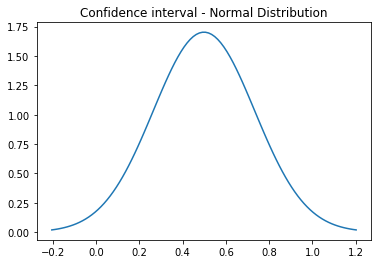

['knn', 'rfc', 'svm']


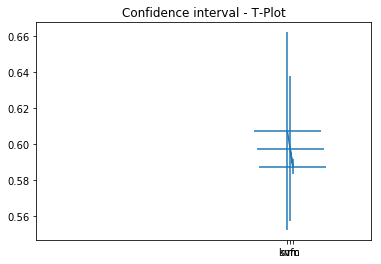

Algorithm: knn

Accuracy: 0.50 (+/- 0.11)


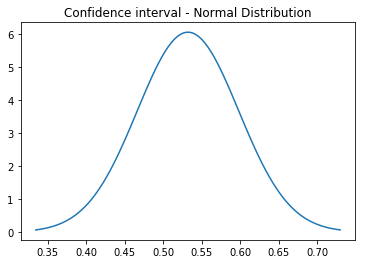

['knn', 'rfc', 'svm']


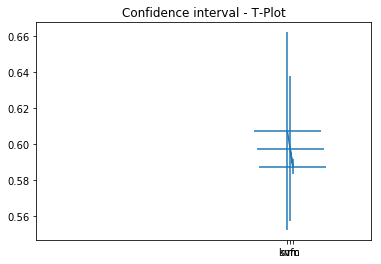

Algorithm: rfc

Accuracy: 0.53 (+/- 0.01)


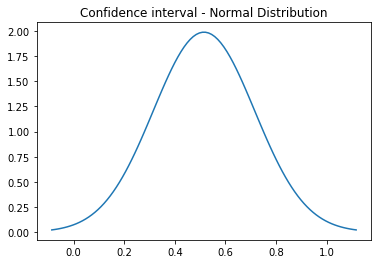

['knn', 'rfc', 'svm']


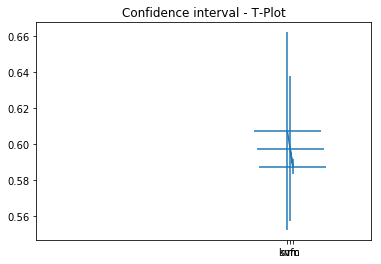

Algorithm: svm

Accuracy: 0.52 (+/- 0.08)


In [65]:
score_evaluation(best_test_score, best_std_test)

In [69]:
for alg in test_score:
    
    overfitting_underfitting_evaluation(alg, parameters[alg], train_score[alg], test_score[alg], std_train[alg], std_test[alg])




knn


NameError: name 'validation_curve' is not defined